<a href="https://colab.research.google.com/github/khurramahmed/diseaseprediction/blob/main/diseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Disease Prediction Using Scikit Learn Classification Based KNN algorithm**

First, I imported the relevant libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

The dataset is taken from Kaggle (Source: https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning)


*  Complete Dataset consists of a training and testing data.
*  Each file has 133 columns. 132 of these columns are symptoms that a person experiences and last column is the prognosis.
*  These symptoms are mapped to 42 diseases.

Firstly, loading the training data.

In [6]:
trainurl = 'https://raw.githubusercontent.com/khurramahmed/diseaseprediction/main/Training.csv'
train = pd.read_csv(trainurl)
train = train.iloc[:,0:133]
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


Checking the different types of diseases in the data.

In [ ]:
print(train['prognosis'].unique())
le = LabelEncoder()
train.iloc[:,132] = le.fit_transform(train.iloc[:,132])
train.head()

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


Encoding the diseases to numeric classes to be used by the KNN algorithm.

In [7]:
le = LabelEncoder()
train.iloc[:,132] = le.fit_transform(train.iloc[:,132])
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


 Seperating labels (y) and features (x) from the training data.

In [8]:
y = train.iloc[:,-1]
x = train.iloc[:,0:132]

Using Extra Tree Classifier to check which features are important in explaining the model. Higher score means that the feature is important for explaining the output variable.

In [9]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.01494337 0.00533269 0.00676873 0.00646885 0.00494538 0.01119614
 0.01083108 0.01247481 0.00555699 0.00428158 0.00582518 0.01134397
 0.00623347 0.00736859 0.01177399 0.00049384 0.00072715 0.00046339
 0.00125812 0.01206291 0.00315718 0.00277538 0.0084524  0.00119731
 0.01012944 0.0118506  0.00633219 0.00981393 0.01147302 0.00645175
 0.00239265 0.00929329 0.00913184 0.01380581 0.01275118 0.00882552
 0.01109136 0.00891527 0.0030087  0.01043964 0.01490764 0.01522636
 0.00096086 0.0154586  0.0025247  0.         0.00556931 0.0061564
 0.01054435 0.00305769 0.0061245  0.00376011 0.0059759  0.00422045
 0.00373743 0.00148958 0.01521157 0.0045686  0.00895962 0.00707362
 0.00523537 0.00565197 0.00497232 0.00904289 0.00785083 0.00370649
 0.00499655 0.0039095  0.00645052 0.00028518 0.00094854 0.00407014
 0.00727978 0.00657282 0.00630702 0.00510241 0.00119447 0.01132064
 0.01078222 0.00682092 0.01217946 0.0051709  0.00500128 0.00815908
 0.00421561 0.0086034  0.01486544 0.00323851 0.00552606 0.01204

Keeping the 20 features with highest scores.

In [11]:
importance = pd.Series(model.feature_importances_, index = x.columns)
importance.nlargest(20).index

Index(['muscle_pain', 'altered_sensorium', 'yellowing_of_eyes', 'mild_fever',
       'chest_pain', 'itching', 'diarrhoea', 'unsteadiness', 'dark_urine',
       'lack_of_concentration', 'mucoid_sputum', 'family_history', 'nausea',
       'passage_of_gases', 'stomach_pain', 'muscle_weakness', 'weight_loss',
       'bladder_discomfort', 'increased_appetite', 'high_fever'],
      dtype='object')

<Axes: >

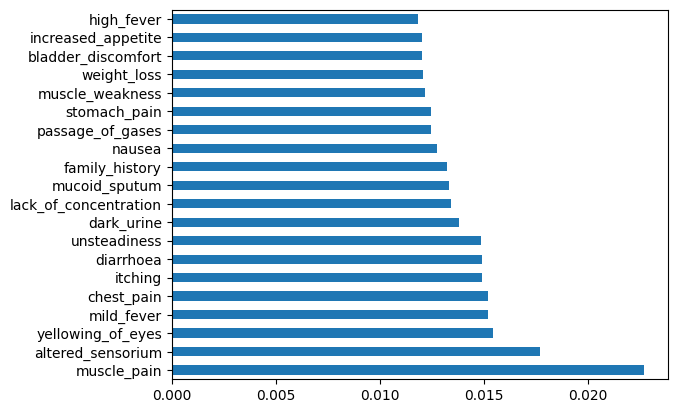

In [12]:
importance.nlargest(20).plot(kind = 'barh')

Using the 20 selected features to check for correlation with the training labels (prognosis). We want features with low correlation.

In [17]:
for_matrix = train[['muscle_pain', 'itching', 'yellowing_of_eyes', 'unsteadiness',
       'vomiting', 'altered_sensorium', 'dark_urine', 'diarrhoea',
       'chest_pain', 'lack_of_concentration', 'abnormal_menstruation',
       'fatigue', 'mild_fever', 'joint_pain', 'mucoid_sputum',
       'muscle_weakness', 'high_fever', 'increased_appetite',
       'passage_of_gases', 'prognosis']]
corrmat = for_matrix.corr()
corr_important_features = corrmat.index

Plotting the confusion matrix to check for correlation.

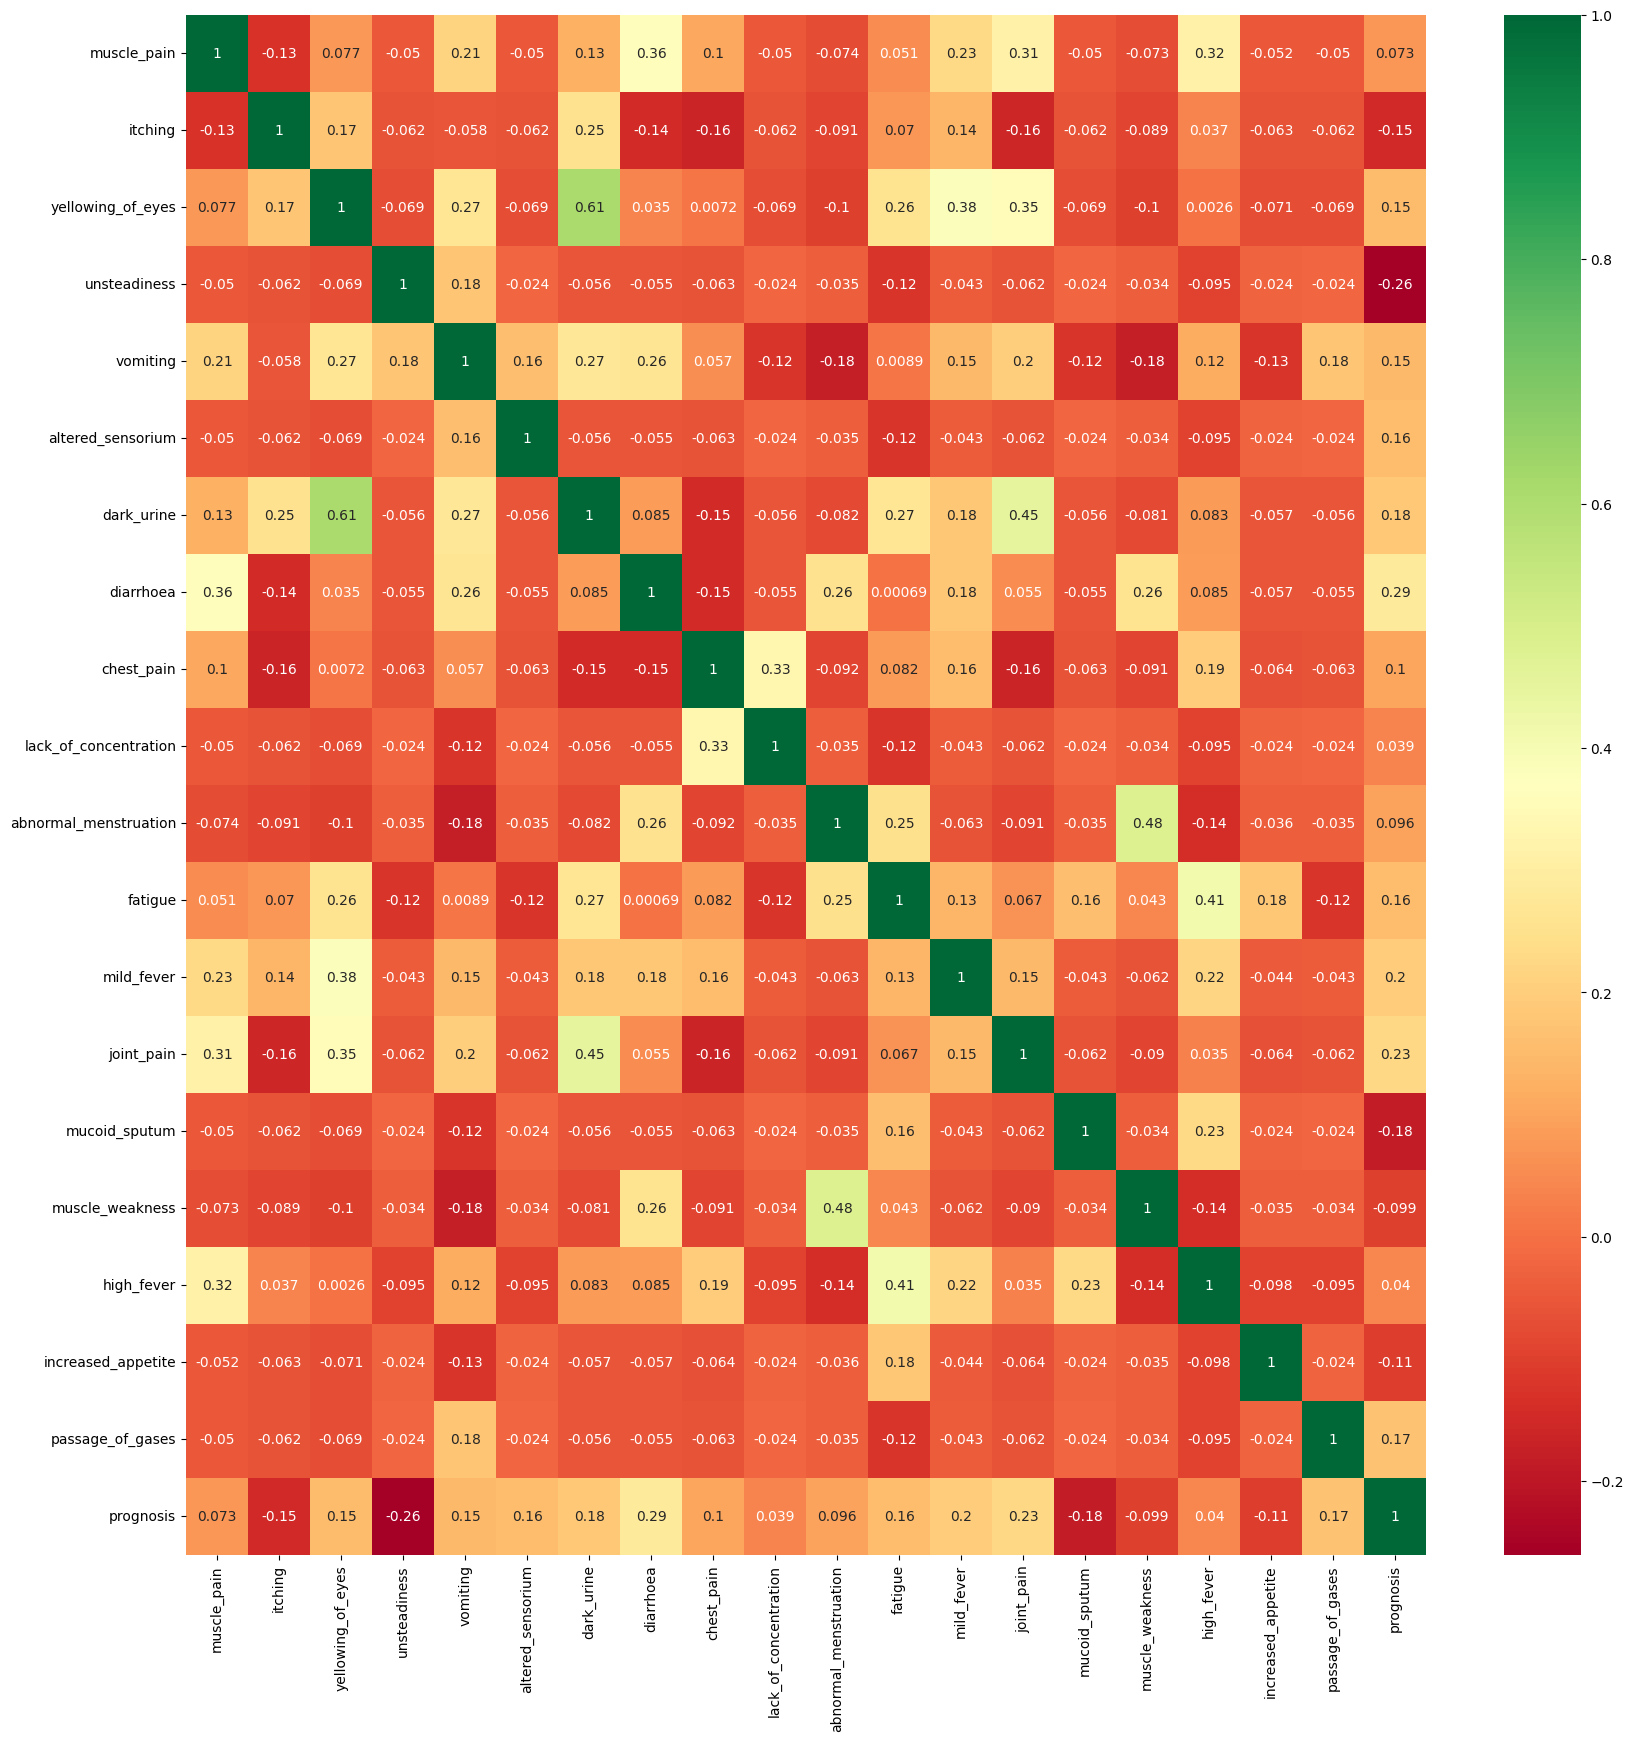

In [18]:
plt.figure(figsize = (20,20))
corr_heatmap = sns.heatmap(for_matrix[corr_important_features].corr(), annot = True, cmap = 'RdYlGn')

Variables with high correlation to prognosis are *itching unsteadiness* (-0.26),* diarrhoea* (0.29), *mild_fever* (0.2), and *joint_pain* (0.23)

Now using the KNN classifer to predict the prognosis using disease symptoms. Hear we use hamming distance as the features are all binary.

In [19]:
classifier = KNeighborsClassifier(n_neighbors=101, metric = 'hamming')
classifier.fit(x, y)

KNeighborsClassifier(metric='hamming', n_neighbors=101)

Now loading test data, for checking how well our algorithm has predicted. Encoding of test labels to numeric values is also done.

In [20]:
testurl= "https://raw.githubusercontent.com/khurramahmed/diseaseprediction/main/Testing.csv"

In [21]:
test = pd.read_csv(testurl)
test.iloc[:,132] = le.fit_transform(test.iloc[:,132])
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,16
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,14


Seperating labels (y) and features (x) from the test data.

In [22]:
y_test = test.iloc[:,-1]
x_test = test.iloc[:,0:132]

Using text data to predict disease based on symptoms

In [23]:
y_pred = classifier.predict(x_test)

Using classification report and confusion matrix to check how well the algorithm has perform on test data.

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15   

From the above results, a perfect prediction is achieved. However, this is due to the fact that the data was clean and diseases were cleary defined by their symptoms. In practical world this is often the case, and various algorithms need to be tried to get acceptable classification accuracy.